#Взаимосвязь чрезмерного употребления алкоголя и макроэкономических показателей Японии

Сначала настроим среду, подключив библиотеки и настроив необходимые функции

In [ ]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import numpy as np
import pandas as pd

# Уровень потребления алкоголя


Обработаем данные

Данные хранятся по этой ссылке: https://docs.google.com/spreadsheets/d/1763uvacyyk7GqVR5QsKxVemtpXEHv9ui/edit?usp=sharing&ouid=111191777688565181607&rtpof=true&sd=true, предоставленные ВОЗ  в отчете за 2018 год. Более поздние данные собраны по данным ОЭСР за 2019 и 2022 годы.

In [ ]:
df_alc = pd.read_excel('Alcohol consumption.xlsx') # ссылка на сам файл( лежит на гугл диске) https://docs.google.com/spreadsheets/d/1oJbBRkjVpNCcCa0tn4_VrT2h5I5Yzds2/edit?usp=sharing&ouid=111191777688565181607&rtpof=true&sd=true
df_alc # Печатаем датафрейм


,Страна,Год,Потребление алкоголя
0,Japan,1960,4.30
1,Japan,1970,5.60
2,Japan,1980,6.50
3,Japan,1990,7.20
4,Japan,1996,7.85
5,Japan,2000,8.23
6,Japan,2005,7.99
7,Japan,2010,7.20
8,Japan,2015,7.87
9,Japan,2016,8.00


Вот собранные нами данные, теперь составим по ним различные визульные представления.

In [ ]:
df_alc.info()#информация по таблице уровня потребления алкоголя

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Страна                13 non-null     object 
 1   Год                   13 non-null     int64  
 2   Потребление алкоголя  13 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 440.0+ bytes


In [ ]:
df_alc.columns = df_alc.columns.str.strip()#уберем пробелы в названиях
print(df_alc.columns)#выведем название столбцов, чтобы с ними было удобнее работать

Index(['Страна', 'Год', 'Потребление алкоголя'], dtype='object')


In [ ]:
df_alc.head(10)# еще раз посмотрим на таблицу

,Страна,Год,Потребление алкоголя
0,Japan,1960,4.30
1,Japan,1970,5.60
2,Japan,1980,6.50
3,Japan,1990,7.20
4,Japan,1996,7.85
5,Japan,2000,8.23
6,Japan,2005,7.99
7,Japan,2010,7.20
8,Japan,2015,7.87
9,Japan,2016,8.00


Теперь нарисуем графики

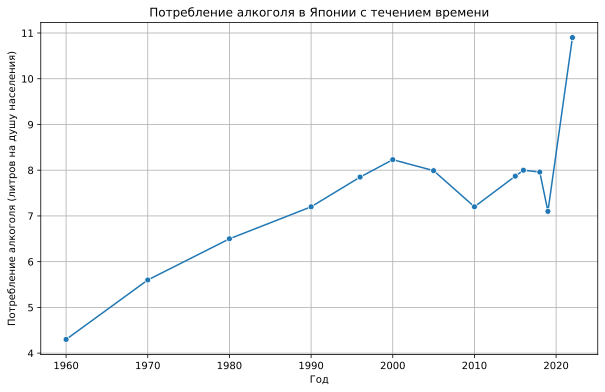

In [ ]:
# Линейный график потребления алкоголя с течением времени
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_alc, x='Год', y='Потребление алкоголя', marker='o')
plt.title('Потребление алкоголя в Японии с течением времени')
plt.xlabel('Год')
plt.ylabel('Потребление алкоголя (литров на душу населения)')
plt.grid(True)
plt.show()



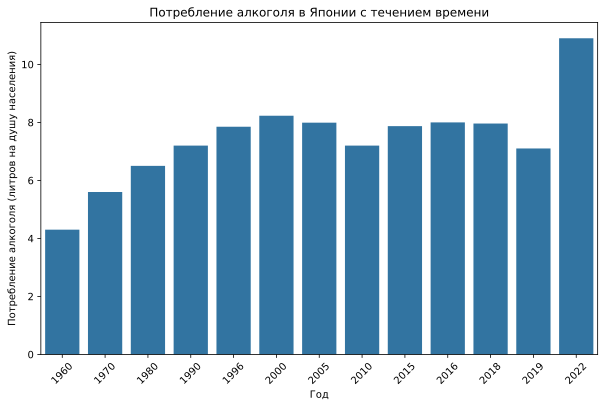

In [ ]:
# Столбчатая диаграмма потребления алкоголя с течением времени
plt.figure(figsize=(10, 6))
sns.barplot(data=df_alc, x='Год', y='Потребление алкоголя')
plt.title('Потребление алкоголя в Японии с течением времени')
plt.xlabel('Год')
plt.ylabel('Потребление алкоголя (литров на душу населения)')
plt.xticks(rotation=45)
plt.show()

Добавим данные по потреблению алкоголя в США и нарисуем график, чтобы визуально сранить https://docs.google.com/spreadsheets/d/1DcM6_SuQP8OfOW-DxQPm3ZVyWOMv7AF8/edit?usp=sharing&ouid=111191777688565181607&rtpof=true&sd=true

In [ ]:
df_usa = pd.read_excel('usa.xlsx')

In [ ]:
df_mix = pd.concat([df_alc, df_usa])# соединим данные

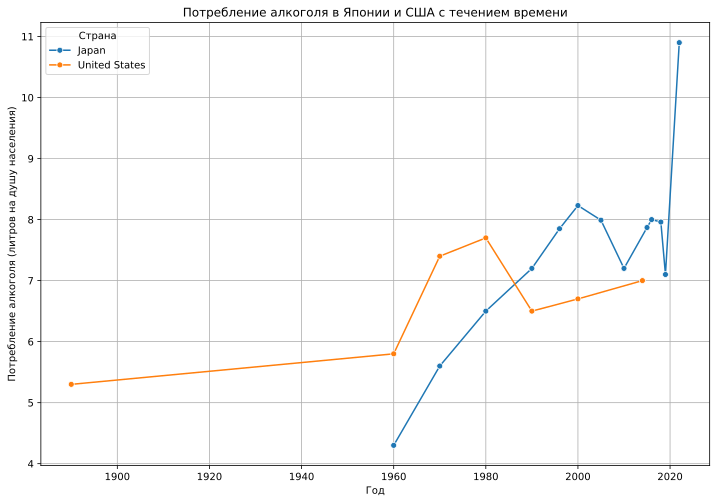

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_mix, x='Год', y='Потребление алкоголя', hue='Страна', marker='o')
plt.title('Потребление алкоголя в Японии и США с течением времени')
plt.xlabel('Год')
plt.ylabel('Потребление алкоголя (литров на душу населения)')
plt.grid(True)
plt.legend(title='Страна')
plt.show()

Тогда сравним по годам: в 1960 году потребление алкоголя в США (5.80 литра) было выше, чем в Японии (4.30 литра). В 1970-х и 1980-х годах потребление алкоголя в США оставалось выше, чем в Японии. В 1990-х годах разница между потреблением алкоголя в Японии и США уменьшилась, и в 2000-х годах Япония превзошла США по этому показателю, так и остается в наши дни.

#ВВП

Теперь приступим к макроэкономическим показателям. Рассмотрим первым такой показатель, как ВВП на душу населения (ППС) паритет покупательной способности, \$.Это один из самых главных экономических показателей, который помогает справедливо оценивать уровень экономического развития и благосостояния, учитывая различия в стоимости жизни.

Данные по ВВП можно посмотреть по ссылке https://docs.google.com/spreadsheets/d/1MvjfHJsLbE90mtEJWULtvHu648QGHRXq/edit?usp=sharing&ouid=111191777688565181607&rtpof=true&sd=true

In [ ]:
df_gpd = pd.read_excel('gpd.xlsx')
df_gpd.head(10)

,Год,"ВВП на душу населения (ППС), $"
0,1980,9147.0
1,1981,10358.1
2,1982,11283.0
3,1983,12054.5
4,1984,12967.1
5,1985,13989.8
6,1986,14667.9
7,1987,15666.3
8,1988,17246.0
9,1989,18719.6


Обработаем данные для дальнейшей работы

In [ ]:
print(df_gpd.columns)
df_gpd.info()
df_gpd['ВВП на душу населения (ППС), $'] = df_gpd['ВВП на душу населения (ППС), $'].astype(float)

Index(['Год', 'ВВП на душу населения (ППС), $'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             41 non-null     int64  
 1   ВВП на душу населения (ППС), $  41 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 784.0 bytes


Теперь нарисуем графики по ВВП

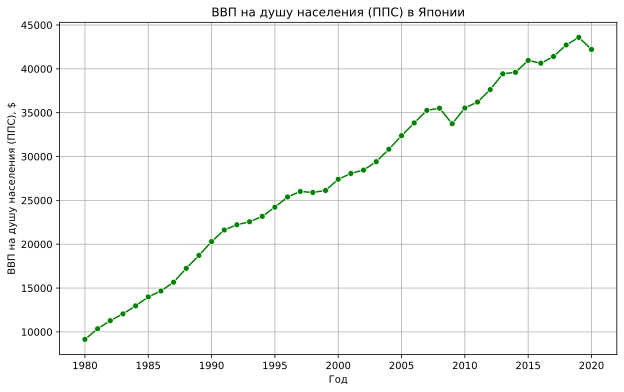

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_gpd, x='Год', y='ВВП на душу населения (ППС), $', marker='o', color = 'green')
plt.title('ВВП на душу населения (ППС) в Японии')
plt.xlabel('Год')
plt.ylabel('ВВП на душу населения (ППС), $')
plt.grid(True)
plt.show()

И еще один интерактивный

In [ ]:
import plotly.graph_objects as go
fig = go.Figure() # создаем интерактивный график

fig.add_trace(go.Scatter(x=df_gpd['Год'], y=df_gpd['ВВП на душу населения (ППС), $'], name = 'Япония', line=dict(color='#0A2438')))


fig.update_layout(title_text = "ВВП Японии", title_x=0.5)
fig.update_xaxes(title_text = "Год")
fig.update_yaxes(title_text = "ВВП")

fig.update_layout( # добавляем слайдер по времени
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

Теперь приступим к корреляционному анализу по трем переменным: год, уровень потребления алкоголя и ВВП на душу населения. Соединим данные по столбцу: год.

In [ ]:
merged_table = pd.merge(df_alc, df_gpd, on=['Год'])
merged_table

,Страна,Год,Потребление алкоголя,"ВВП на душу населения (ППС), $"
0,Japan,1980,6.50,9147.0
1,Japan,1990,7.20,20302.7
2,Japan,1996,7.85,25385.0
3,Japan,2000,8.23,27409.2
4,Japan,2005,7.99,32372.7
5,Japan,2010,7.20,35535.2
6,Japan,2015,7.87,40959.3
7,Japan,2016,8.00,40640.5
8,Japan,2018,7.96,42719.6
9,Japan,2019,7.10,43584.8


In [ ]:
merged_table = merged_table.drop(columns=['Страна'])#удалим столбец страны, так как с ним не получится составить корреляцирнную матрицу
corr = merged_table.corr()
corr.round(2)


,Год,Потребление алкоголя,"ВВП на душу населения (ППС), $"
Год,1.00,0.47,1.0
Потребление алкоголя,0.47,1.00,0.5
"ВВП на душу населения (ППС), $",1.00,0.50,1.0


Можем сделать следубщие выводы:

1. Положительная связь между годом и ВВП на душу населения: 1.00. Указывает на идеальную положительную корреляцию между годом и ВВП на душу населения (ППС). Значит, что с каждым годом ВВП на душу населения стабильно увеличивается.
2. Умеренная положительная связь между годом и потреблением алкоголя: 0.47 . Указывает, что существует умеренная положительная корреляция между годом и потреблением алкоголя. Значит, что с течением времени потребление алкоголя, как правило, растет, но эта связь не является столь сильной, как в случае с ВВП.
3. Умеренная положительная связь между потреблением алкоголя и ВВП на душу населения: 0.50. Значит, свидетельствует о том, что существует умеренная положительная корреляция между потреблением алкоголя и ВВП на душу населения. Это означает, что по мере увеличения ВВП на душу населения потребление алкоголя также, как правило, увеличивается, но связь не является исключительно сильной.


С увеличением благосостояния населения (увеличение ВВП на душу населения) существует тенденция к увеличению потребления алкоголя. Все же рано делать однозначный вывод, так как нужно понимать, что корреляционный анализ не означает причинно-следственную связь.

Для наглядности сделаем тепловую карту

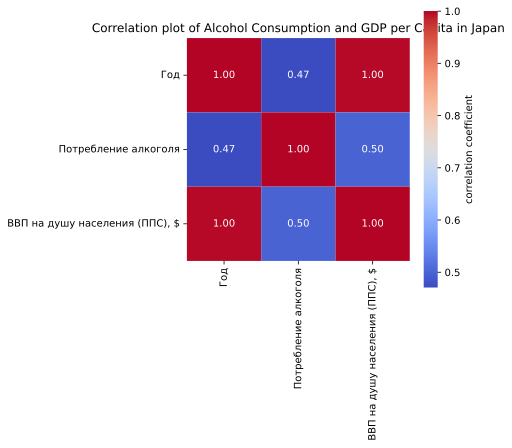

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'label': 'correlation coefficient'}, square=True, fmt='.2f')
plt.title('Correlation plot of Alcohol Consumption and GDP per Capita in Japan')
plt.show()

Также посчитаем Коэффициент корреляции Пирсона (0.50), также показывает умеренную связь между потреблением алкоголя и ВВП на душу населения.

In [ ]:
from scipy.stats import pearsonr
corr = merged_table.corr()

# Вычисление коэффициента корреляции Пирсона
pearson_corr, p_value = pearsonr(merged_table['Потребление алкоголя'], merged_table['ВВП на душу населения (ППС), $'])
print(f'Коэффициент корреляции Пирсона: {pearson_corr:.2f}')
print(f'P-значение: {p_value:.2e}')

Коэффициент корреляции Пирсона: 0.50
P-значение: 1.43e-01


Теперь проведем регресссионный анализ

                             OLS Regression Results                             
Dep. Variable:     Потребление алкоголя   R-squared:                       0.248
Model:                              OLS   Adj. R-squared:                  0.154
Method:                   Least Squares   F-statistic:                     2.644
Date:                  Thu, 20 Jun 2024   Prob (F-statistic):              0.143
Time:                          17:37:07   Log-Likelihood:                -6.3120
No. Observations:                    10   AIC:                             16.62
Df Residuals:                         8   BIC:                             17.23
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

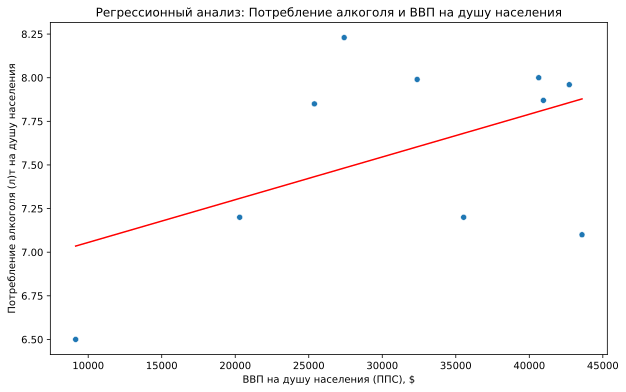

In [ ]:
import statsmodels.api as sm
# Подготовка данных
X = merged_table['ВВП на душу населения (ППС), $']
y = merged_table['Потребление алкоголя']

# Добавление константы (для перехвата)
X = sm.add_constant(X)

# Построение регрессионной модели
model = sm.OLS(y, X).fit()

# Вывод результатов модели
print(model.summary())

# Построение графика регрессии
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ВВП на душу населения (ППС), $', y='Потребление алкоголя', data=merged_table)
sns.lineplot(x=merged_table['ВВП на душу населения (ППС), $'], y=model.predict(X), color='red')
plt.title('Регрессионный анализ: Потребление алкоголя и ВВП на душу населения')
plt.xlabel('ВВП на душу населения (ППС), $')
plt.ylabel('Потребление алкоголя (л)т на душу населения')
plt.savefig('my_plot.png')
plt.show()



Из предоставленных результатов регрессионного анализа мы делаем следующие выводы:

1. Наша модель показывает слабую объясняющую способность (значение R-квадрата (R²)= 0.248), это значит, что только около 24.8\% вариации в потреблении алкоголя можно объяснить изменениями в ВВП на душу населения.
2. Коэффициент при ВВП на душу населения не является статистически значимым, так как p-value = 0.143, что означает, что связь между ВВП на душу населения и потреблением алкоголя не подтверждается на уровне значимости 0.05 и на даже на уровне 0.1.

# Безработица

Данные по ссылке: https://docs.google.com/spreadsheets/d/12BGfXi9LBXCs6mkEOasF0XjfO1sjeYaB/edit?usp=sharing&ouid=111191777688565181607&rtpof=true&sd=true

In [ ]:
df_unem = pd.read_excel(' unemployment.xlsx')
df_unem.head(10)

,Год,"Безработица, %"
0,1980,2.0
1,1981,2.2
2,1982,2.4
3,1983,2.7
4,1984,2.7
5,1985,2.6
6,1986,2.8
7,1987,2.9
8,1988,2.5
9,1989,2.3


In [ ]:
print(df_unem.columns)
df_unem['Безработица, %'] = df_unem['Безработица, %'].astype(float)
df_unem.info()

Index(['Год', 'Безработица, %'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Год             42 non-null     int64  
 1   Безработица, %  42 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 800.0 bytes


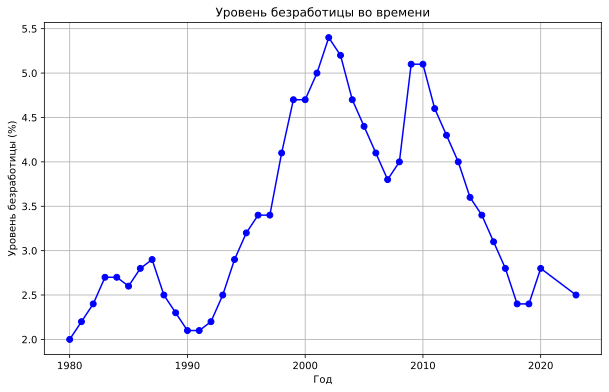

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_unem['Год'], df_unem['Безработица, %'], marker='o', linestyle='-', color='b')
plt.title('Уровень безработицы во времени')
plt.xlabel('Год')
plt.ylabel('Уровень безработицы (%)')
plt.grid(True)
plt.savefig('my_plot.png')
plt.show()

In [ ]:
merged_table1 = pd.merge(df_alc, df_unem, on=['Год'])
merged_table1

,Страна,Год,Потребление алкоголя,"Безработица, %"
0,Japan,1980,6.50,2.0
1,Japan,1990,7.20,2.1
2,Japan,1996,7.85,3.4
3,Japan,2000,8.23,4.7
4,Japan,2005,7.99,4.4
5,Japan,2010,7.20,5.1
6,Japan,2015,7.87,3.4
7,Japan,2016,8.00,3.1
8,Japan,2018,7.96,2.4
9,Japan,2019,7.10,2.4


Теперь составим корреляционную матрицу для трех переменных: год, потребление алкоголя, безработица.

In [ ]:
merged_table1 = merged_table1.drop(columns=['Страна'])
corr1 = merged_table1.corr()
corr1.round(2)

,Год,Потребление алкоголя,"Безработица, %"
Год,1.00,0.47,0.20
Потребление алкоголя,0.47,1.00,0.47
"Безработица, %",0.20,0.47,1.00


Выводы:

1.Положительная корреляция между годом и потреблением алкоголя:0.47.Значит, что с течением времени потребление алкоголя увеличивается.

2.Слабая положительная корреляция между годом и уровнем безработицы:0.20. Значит, что уровень безработицы немного увеличивается со временем.

3.Положительная корреляция между потреблением алкоголя и уровнем безработицы: 0.47. Значит, что с увеличением потребления алкоголя также увеличивается уровень безработицы.

# Инфляция

Данные по ссылке: https://docs.google.com/spreadsheets/d/1jhz74vgA7bxTR_2yiv5vAvKIAUM1JiBX/edit?usp=share_link&ouid=111191777688565181607&rtpof=true&sd=true

In [ ]:
df_inf = pd.read_excel('inflation.xlsx')
df_inf.head(10)

,Год,"Уровень инфляции, %"
0,1980,7.8
1,1981,4.9
2,1982,2.7
3,1983,1.9
4,1984,2.3
5,1985,2.0
6,1986,0.6
7,1987,0.1
8,1988,0.7
9,1989,2.3


In [ ]:
print(df_inf.columns)
df_inf['Уровень инфляции, %'] = df_inf['Уровень инфляции, %'].astype(float)
df_inf.info()

Index(['Год', 'Уровень инфляции, %'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Год                  42 non-null     int64  
 1   Уровень инфляции, %  42 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 800.0 bytes


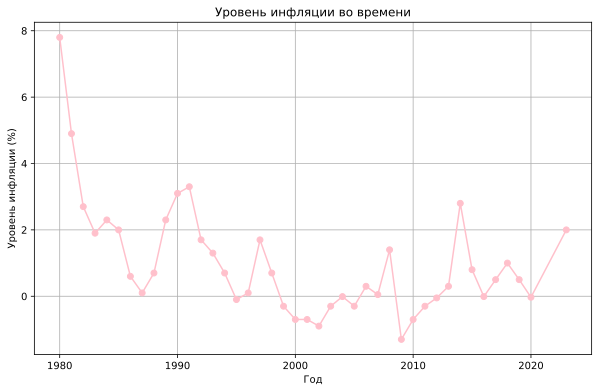

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_inf['Год'], df_inf['Уровень инфляции, %'], marker='o', linestyle='-', color='pink')
plt.title('Уровень инфляции во времени')
plt.xlabel('Год')
plt.ylabel('Уровень инфляции (%)')
plt.grid(True)
plt.savefig('my_plot.png')
plt.show()

In [ ]:
merged_table2 = pd.merge(df_alc, df_inf, on=['Год'])
merged_table2

,Страна,Год,Потребление алкоголя,"Уровень инфляции, %"
0,Japan,1980,6.50,7.80
1,Japan,1990,7.20,3.10
2,Japan,1996,7.85,0.10
3,Japan,2000,8.23,-0.70
4,Japan,2005,7.99,-0.30
5,Japan,2010,7.20,-0.70
6,Japan,2015,7.87,0.80
7,Japan,2016,8.00,-0.01
8,Japan,2018,7.96,1.00
9,Japan,2019,7.10,0.50


In [ ]:
merged_table2 = merged_table2.drop(columns=['Страна'])
corr2 = merged_table2.corr()
corr2.round(2)

,Год,Потребление алкоголя,"Уровень инфляции, %"
Год,1.00,0.47,-0.70
Потребление алкоголя,0.47,1.00,-0.75
"Уровень инфляции, %",-0.70,-0.75,1.00


Выводы:

1. Сильная отрицательная корреляция между годом и уровнем инфляции:-0.70. Значит, что с течением времени уровень инфляции резко уменьшается.

2. Сильная отрицательная корреляция между потреблением алкоголя и уровнем инфляции:-0.75.
Значит, с увеличением потребления алкоголя уровень инфляции уменьшается.

# Множественная линейная регрессия

Приступим к множественной линейной регрессии. Как мы увидели ранее, невозможно оценить взаимосвязь по одному признаку (используя один макроэкономичский показатель), поэтому попробуем построить множественную линейную регрессию. Для этого построим модель, включающую все экономические показатели одновременно, чтобы увидеть их совместное влияние на потребление алкоголя. Соединим все данные по общему столбцу: Год.

In [ ]:
merged_table3 = pd.merge(df_alc, df_inf,on=['Год'])
merged_table3 = pd.merge(merged_table3, df_unem,on=['Год'])
merged_table3 = pd.merge(merged_table3, df_gpd,on=['Год'])
merged_table3
print(merged_table3.columns)

Index(['Страна', 'Год', 'Потребление алкоголя', 'Уровень инфляции, %',
       'Безработица, %', 'ВВП на душу населения (ППС), $'],
      dtype='object')


In [ ]:
merged_table3 = merged_table3.drop(columns=['Страна'])
corr3 = merged_table3.corr()
corr3.round(2)

,Год,Потребление алкоголя,"Уровень инфляции, %","Безработица, %","ВВП на душу населения (ППС), $"
Год,1.00,0.47,-0.70,0.20,1.00
Потребление алкоголя,0.47,1.00,-0.75,0.47,0.50
"Уровень инфляции, %",-0.70,-0.75,1.00,-0.68,-0.72
"Безработица, %",0.20,0.47,-0.68,1.00,0.20
"ВВП на душу населения (ППС), $",1.00,0.50,-0.72,0.20,1.00


Для наглядности нарисуем тепловую матрицу

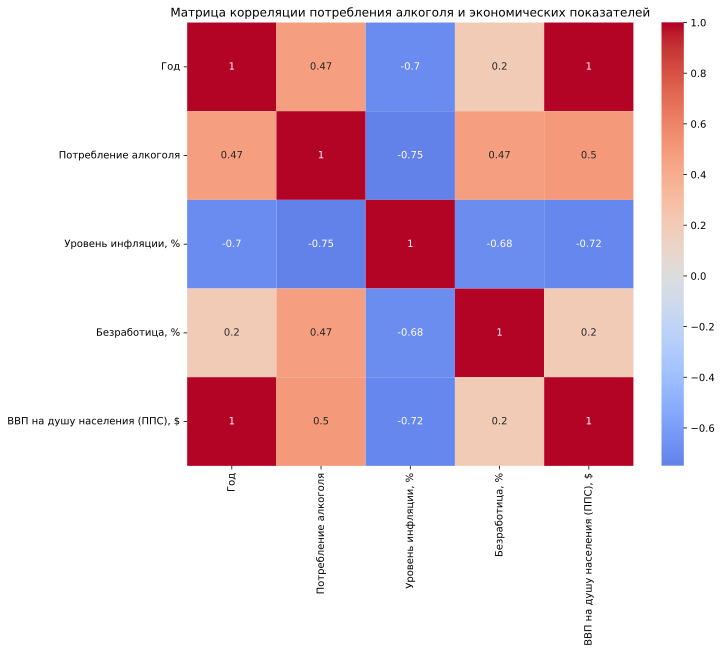

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr3, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции потребления алкоголя и экономических показателей')
plt.show()

In [ ]:
import statsmodels.api as sm

# Зависимая переменная
y = merged_table3['Потребление алкоголя']

# Независимые переменные
X = merged_table3[['Год', 'Уровень инфляции, %', 'Безработица, %', 'ВВП на душу населения (ППС), $']]

# Добавление константы для интерсепта
X = sm.add_constant(X)

# Построение модели множественной линейной регрессии
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Вывод результатов
print(model.summary())



                             OLS Regression Results                             
Dep. Variable:     Потребление алкоголя   R-squared:                       0.583
Model:                              OLS   Adj. R-squared:                  0.249
Method:                   Least Squares   F-statistic:                     1.746
Date:                  Thu, 20 Jun 2024   Prob (F-statistic):              0.276
Time:                          18:26:39   Log-Likelihood:                -3.3693
No. Observations:                    10   AIC:                             16.74
Df Residuals:                         5   BIC:                             18.25
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------